In [1]:
# %% [markdown]
# # NLP Data Exploration
# This notebook explores the sentiment dataset before preprocessing

# %%
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter

# Set style for better visualizations
plt.style.use('ggplot')
sns.set_palette("Set2")
%matplotlib inline

In [2]:
# %%
# Load the dataset
try:
    df = pd.read_csv('../../data/raw/Sentiment dataset.csv')
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset Shape: {df.shape}")
except FileNotFoundError:
    print("❌ Error: File not found at '../../data/raw/Sentiment dataset.csv'")
    print("Please check the file path and make sure the file exists.")

✅ Dataset loaded successfully!
📊 Dataset Shape: (732, 15)


In [3]:
# %%
# Display basic information
print("📋 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\n📝 Dataset Info:")
df.info()

📋 Column Names:
  1. Unnamed: 0.1
  2. Unnamed: 0
  3. Text
  4. Sentiment
  5. Timestamp
  6. User
  7. Platform
  8. Hashtags
  9. Retweets
  10. Likes
  11. Country
  12. Year
  13. Month
  14. Day
  15. Hour

📝 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           73

In [4]:

# %%
# Display first few rows
print("👀 First 5 rows:")
display(df.head())

👀 First 5 rows:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
# %%
# Display last few rows
print("👀 Last 5 rows:")
display(df.tail())

👀 Last 5 rows:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [6]:
# %%
# Check for missing values
print("🔍 Missing values:")
missing_data = df.isnull().sum()
print(missing_data)

if missing_data.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_data[missing_data > 0].plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Count of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

🔍 Missing values:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [7]:
# %%
# Basic statistics for numerical columns
print("📊 Basic Statistics for Numerical Columns:")
display(df.describe())

📊 Basic Statistics for Numerical Columns:


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [8]:
# %%
# Identify text and label columns automatically
text_column = None
label_column = None

# Common column names for text and sentiment
possible_text_cols = ['text', 'review', 'comment', 'message', 'content', 'tweet', 'sentence', 'phrase']
possible_label_cols = ['sentiment', 'label', 'category', 'class', 'rating', 'emotion', 'score']

for col in df.columns:
    if col.lower() in possible_text_cols:
        text_column = col
    if col.lower() in possible_label_cols:
        label_column = col

# If automatic detection fails, use heuristics
if text_column is None:
    for col in df.columns:
        if df[col].dtype == 'object' and col != label_column:
            text_column = col
            break
    if text_column is None and len(df.columns) > 0:
        text_column = df.columns[0]

if label_column is None:
    for col in df.columns:
        if col != text_column:
            label_column = col
            break
    if label_column is None and len(df.columns) > 1:
        label_column = df.columns[1]

print(f"📝 Detected text column: {text_column}")
print(f"🏷️  Detected label column: {label_column}")

📝 Detected text column: Text
🏷️  Detected label column: Sentiment


In [9]:
# %%
# Display sample text and labels
if text_column:
    print(f"\n📄 Sample text from '{text_column}':")
    print(df[text_column].iloc[0])
    
if label_column and label_column in df.columns:
    print(f"\n🔖 Sample label from '{label_column}':")
    print(df[label_column].iloc[0])


📄 Sample text from 'Text':
 Enjoying a beautiful day at the park!              

🔖 Sample label from 'Sentiment':
 Positive  



📊 Class Distribution for 'Sentiment':
Sentiment
Positive         44
Joy              42
Excitement       32
Neutral          14
Contentment      14
                 ..
Triumph           1
Heartwarming      1
Obstacle          1
Sympathy          1
Pressure          1
Name: count, Length: 279, dtype: int64


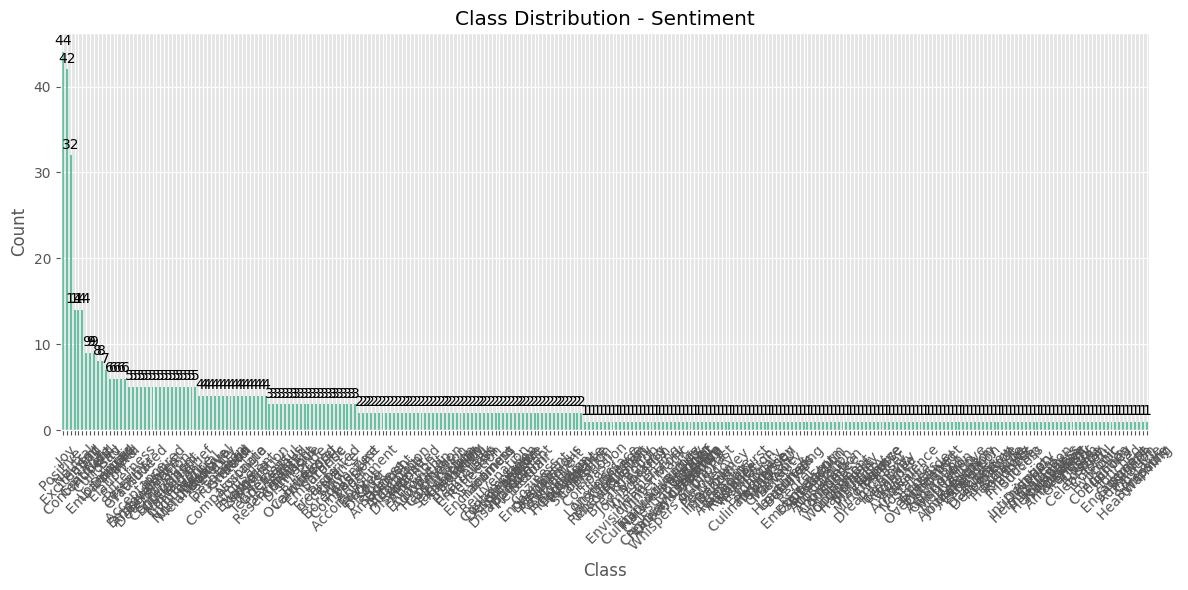

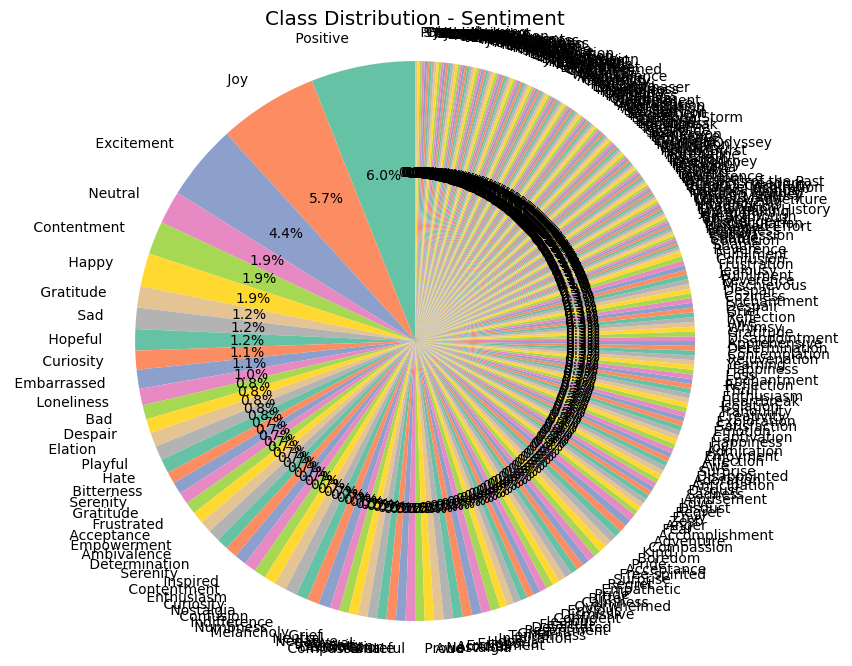

In [12]:
# %%
# Analyze class distribution if label column exists
if label_column and label_column in df.columns:
    print(f"\n📊 Class Distribution for '{label_column}':")
    class_distribution = df[label_column].value_counts()
    print(class_distribution)
    
    # Visualize class distribution
    plt.figure(figsize=(12, 6))
    ax = class_distribution.plot(kind='bar')
    plt.title(f'Class Distribution - {label_column}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(class_distribution):
        ax.text(i, v + 0.01 * max(class_distribution), str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    # Pie chart for class distribution
    plt.figure(figsize=(10, 8))
    plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Class Distribution - {label_column}')
    plt.axis('equal')
    plt.show()

📏 Text Length Statistics:
count    732.000000
mean      87.595628
std       28.999512
min       50.000000
25%       59.000000
50%       83.500000
75%      109.000000
max      157.000000
Name: text_length, dtype: float64


C:\Users\fre\AppData\Local\Temp\ipykernel_18564\4006980904.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
d:\AI-projects\Codveda-DataScience-Internship-Level3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


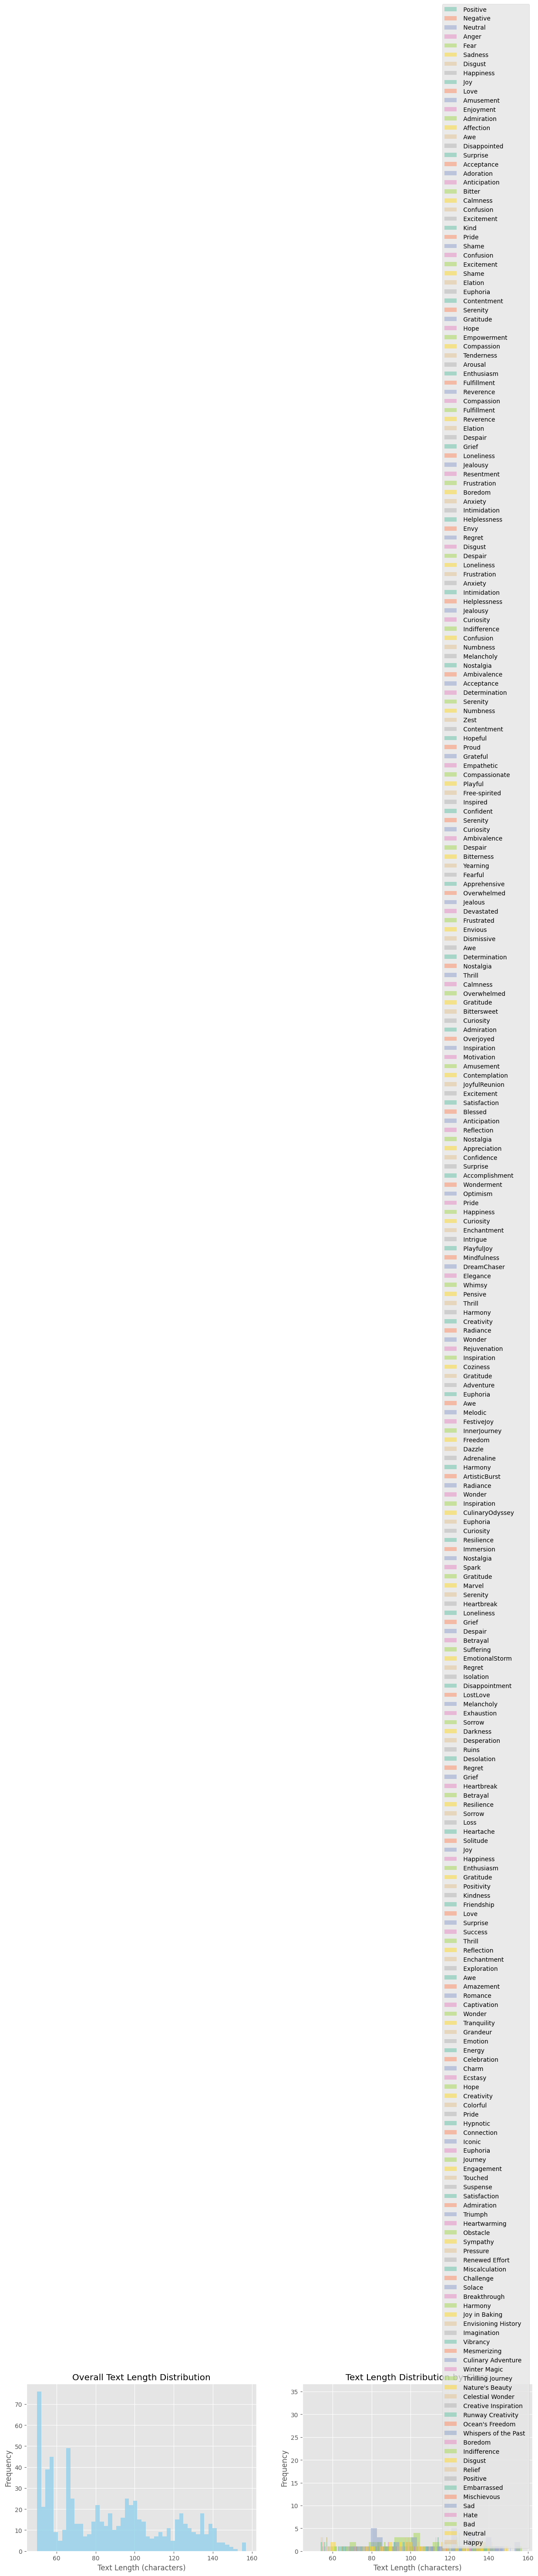

In [13]:
# %%
# Analyze text length distribution
if text_column and text_column in df.columns:
    df['text_length'] = df[text_column].astype(str).apply(len)
    
    print("📏 Text Length Statistics:")
    print(df['text_length'].describe())
    
    # Plot text length distribution
    plt.figure(figsize=(15, 5))
    
    # Overall text length distribution
    plt.subplot(1, 2, 1)
    plt.hist(df['text_length'], bins=50, alpha=0.7, color='skyblue')
    plt.title('Overall Text Length Distribution')
    plt.xlabel('Text Length (characters)')
    plt.ylabel('Frequency')
    
    # Text length distribution by class (if label exists)
    if label_column and label_column in df.columns:
        plt.subplot(1, 2, 2)
        for label in df[label_column].unique():
            subset = df[df[label_column] == label]
            plt.hist(subset['text_length'], alpha=0.5, label=str(label), bins=30)
        
        plt.title('Text Length Distribution by Class')
        plt.xlabel('Text Length (characters)')
        plt.ylabel('Frequency')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

🔤 Top 20 Most Frequent Words:
 1. the             : 830
 2. a               : 656
 3. of              : 623
 4. in              : 300
 5. to              : 134
 6. and             : 111
 7. with            : 111
 8. for             : 99
 9. on              : 92
10. by              : 70
11. s               : 65
12. through         : 52
13. at              : 51
14. an              : 51
15. new             : 43
16. my              : 41
17. as              : 41
18. each            : 39
19. that            : 38
20. life            : 37


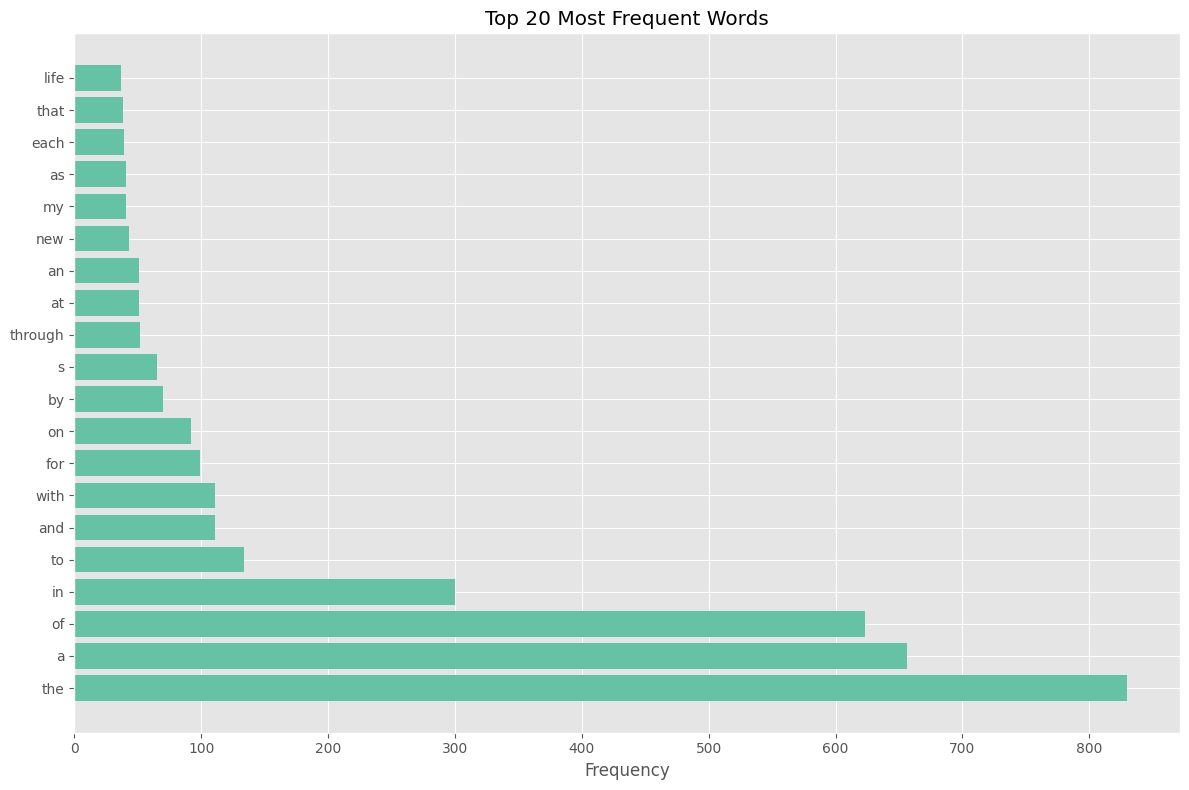

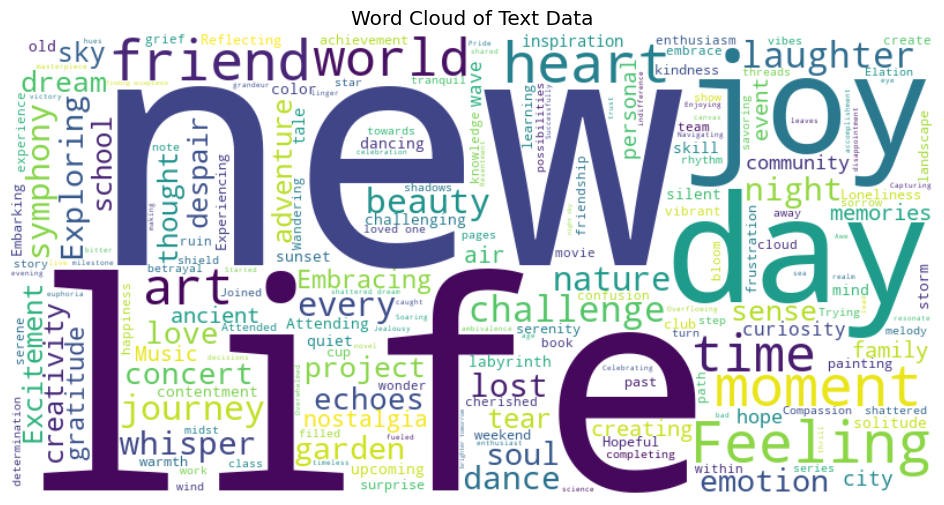

In [14]:
# %%
# Word frequency analysis
if text_column and text_column in df.columns:
    print("🔤 Top 20 Most Frequent Words:")
    
    # Combine all text
    all_text = ' '.join(df[text_column].astype(str).values)
    
    # Extract words
    words = re.findall(r'\w+', all_text.lower())
    
    # Count word frequency
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    
    # Display top words
    for i, (word, count) in enumerate(common_words, 1):
        print(f"{i:2d}. {word:15s} : {count}")
    
    # Visualize top words
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(12, 8))
    plt.barh(words, counts)
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    # Word cloud
    try:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
        
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Text Data')
        plt.show()
    except:
        print("⚠️  Could not generate word cloud (may need to install: pip install wordcloud)")

In [15]:
# %%
# Analyze text by class (if label exists)
if label_column and label_column in df.columns and text_column in df.columns:
    print("📊 Text Analysis by Class:")
    
    for label in df[label_column].unique():
        subset = df[df[label_column] == label]
        text_samples = subset[text_column].astype(str)
        
        print(f"\n🔍 Class: {label}")
        print(f"   Number of samples: {len(subset)}")
        print(f"   Average text length: {text_samples.apply(len).mean():.2f} characters")
        print(f"   Sample text: {text_samples.iloc[0][:100]}...")

📊 Text Analysis by Class:

🔍 Class:  Positive  
   Number of samples: 44
   Average text length: 51.70 characters
   Sample text:  Enjoying a beautiful day at the park!              ...

🔍 Class:  Negative  
   Number of samples: 4
   Average text length: 52.00 characters
   Sample text:  Traffic was terrible this morning.                 ...

🔍 Class:  Neutral   
   Number of samples: 4
   Average text length: 52.00 characters
   Sample text:  Trying out a new recipe for dinner tonight.        ...

🔍 Class:  Anger        
   Number of samples: 2
   Average text length: 54.50 characters
   Sample text:  Can't believe the injustice happening in our society....

🔍 Class:  Fear         
   Number of samples: 2
   Average text length: 56.50 characters
   Sample text:  Feeling a sense of fear after watching a thriller movie. ...

🔍 Class:  Sadness      
   Number of samples: 2
   Average text length: 61.00 characters
   Sample text:  Heartbroken after hearing the news about a natural disast

In [16]:
# %%
# Check for duplicate texts
if text_column in df.columns:
    duplicate_texts = df[text_column].duplicated().sum()
    print(f"🔍 Number of duplicate texts: {duplicate_texts}")
    
    if duplicate_texts > 0:
        print("📋 Duplicate text examples:")
        duplicates = df[df[text_column].duplicated(keep=False)]
        display(duplicates.head())

🔍 Number of duplicate texts: 25
📋 Duplicate text examples:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,text_length
264,265,269,"A compassionate rain, tears of empathy fallin...",Compassionate,2021-07-01 12:10:00,RainNurturer,Facebook,#Compassionate #TearsOfEmpathy,21.0,42.0,Canada,2021,7,1,12,124
265,266,270,"Proudly scaling the peaks of achievement, a m...",Proud,2020-01-05 08:45:00,PeakConqueror,Twitter,#Proud #ScalingPeaks,23.0,46.0,USA,2020,1,5,8,113
266,267,271,"Embraced by the hopeful dawn, a gardener sowi...",Hopeful,2022-07-17 06:15:00,DawnGardener,Instagram,#Hopeful #SeedsOfOptimism,14.0,28.0,UK,2022,7,17,6,114
267,268,272,"A playful escapade in the carnival of life, c...",Playful,2018-08-22 17:20:00,CarnivalDreamer,Facebook,#Playful #CarnivalEscapade,24.0,48.0,Australia,2018,8,22,17,122
268,269,273,"Floating on clouds of inspiration, an artist ...",Inspired,2021-12-08 14:30:00,SkyArtist,Twitter,#Inspired #CloudsOfCreativity,18.0,36.0,India,2021,12,8,14,125


In [17]:
# %%
# Check data types and unique values for each column
print("📋 Column Data Types and Unique Values:")
for col in df.columns:
    print(f"\n{col}:")
    print(f"  Data type: {df[col].dtype}")
    print(f"  Unique values: {df[col].nunique()}")
    
    if df[col].nunique() < 10:  # Show value counts for categorical columns
        print(f"  Value counts:")
        print(df[col].value_counts())

📋 Column Data Types and Unique Values:

Unnamed: 0.1:
  Data type: int64
  Unique values: 732

Unnamed: 0:
  Data type: int64
  Unique values: 732

Text:
  Data type: object
  Unique values: 707

Sentiment:
  Data type: object
  Unique values: 279

Timestamp:
  Data type: object
  Unique values: 683

User:
  Data type: object
  Unique values: 685

Platform:
  Data type: object
  Unique values: 4
  Value counts:
Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

Hashtags:
  Data type: object
  Unique values: 697

Retweets:
  Data type: float64
  Unique values: 26

Likes:
  Data type: float64
  Unique values: 38

Country:
  Data type: object
  Unique values: 115

Year:
  Data type: int64
  Unique values: 14

Month:
  Data type: int64
  Unique values: 12

Day:
  Data type: int64
  Unique values: 31

Hour:
  Data type: int64
  Unique values: 22

text_length:
  Data type: int64
  Unique values: 102


In [18]:
# %%
# Save exploration results for later use
import os

# Create directories if they don't exist
os.makedirs('../../data/processed/', exist_ok=True)

# Save column information
with open('../../data/processed/column_info.txt', 'w') as f:
    f.write(f"text_column: {text_column}\n")
    f.write(f"label_column: {label_column}\n")
    f.write(f"all_columns: {','.join(df.columns)}\n")

print("✅ Exploration completed! Column information saved to '../../data/processed/column_info.txt'")

✅ Exploration completed! Column information saved to '../../data/processed/column_info.txt'


In [19]:
# %%
# Final summary
print("\n" + "="*50)
print("📋 EXPLORATION SUMMARY")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Text column: {text_column}")
print(f"Label column: {label_column}")

if label_column in df.columns:
    print(f"Number of classes: {df[label_column].nunique()}")
    print(f"Class distribution: {dict(df[label_column].value_counts())}")

print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate texts: {df[text_column].duplicated().sum() if text_column in df.columns else 'N/A'}")


📋 EXPLORATION SUMMARY
Dataset shape: (732, 16)
Text column: Text
Label column: Sentiment
Number of classes: 279
Class distribution: {' Positive  ': np.int64(44), ' Joy ': np.int64(42), ' Excitement ': np.int64(32), ' Neutral ': np.int64(14), ' Contentment ': np.int64(14), ' Happy ': np.int64(14), ' Gratitude ': np.int64(9), ' Sad ': np.int64(9), ' Hopeful ': np.int64(9), ' Curiosity ': np.int64(8), ' Embarrassed ': np.int64(8), ' Loneliness ': np.int64(7), ' Bad ': np.int64(6), ' Despair ': np.int64(6), ' Elation       ': np.int64(6), ' Playful ': np.int64(6), ' Hate ': np.int64(6), ' Bitterness ': np.int64(5), ' Serenity      ': np.int64(5), ' Gratitude     ': np.int64(5), ' Frustrated ': np.int64(5), ' Acceptance      ': np.int64(5), ' Empowerment   ': np.int64(5), ' Ambivalence     ': np.int64(5), ' Determination   ': np.int64(5), ' Serenity        ': np.int64(5), ' Inspired ': np.int64(5), ' Contentment   ': np.int64(5), ' Enthusiasm    ': np.int64(5), ' Curiosity       ': np.int6